In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import summary_table
import seaborn as sns

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
st, data, ss2 = summary_table(est2, alpha=0.05)
print(st, data, ss2)

# print("summary()\n",est2.summary())
# print("Intercept and Coefficients\n",est2.params)
# print("Standard Errors\n",est2.bse)
# print("tvalues\n",est2.tvalues)
# print("pvalues\n",est2.pvalues)
# print("rsquared\n",est2.rsquared)
# print("rsquared_adj\n",est2.rsquared_adj)
est2.bse
# for attr in dir(est2):
#     if not attr.startswith('_'):
#         print(attr)
predictions = est2.predict(X2)

#print(est2.predict(X2[:3,:]))
from sklearn.metrics import r2_score,mean_squared_error
#print("r2_score",r2_score(y,predictions))
#slope, intercept, r_value, p_value, std_err = stats.linregress(X2[:,1],y)
#print(slope, intercept, r_value, p_value, std_err)
d1 = pd.DataFrame(X2)
d2 = pd.DataFrame(y)
d1['y'] = y
d1.columns = d1.columns.map(str)
# Plot all independent variables on plot to see check the linearity
# for i in range(len(diabetes.feature_names)):
#     plt.scatter(X[:,i],y)
#     plt.xlabel(diabetes.feature_names[i])
#     sns.lmplot(x=str(i+1), y='y', data=d1)
#     plt.show()

#print(est2.resid)
#sns.residplot(d1['9'],d1['y'],)

In [11]:
X2

array([[ 1.        ,  0.03807591,  0.05068012, ..., -0.00259226,
         0.01990842, -0.01764613],
       [ 1.        , -0.00188202, -0.04464164, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 1.        ,  0.08529891,  0.05068012, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 1.        ,  0.04170844,  0.05068012, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [ 1.        , -0.04547248, -0.04464164, ...,  0.02655962,
         0.04452837, -0.02593034],
       [ 1.        , -0.04547248, -0.04464164, ..., -0.03949338,
        -0.00421986,  0.00306441]])

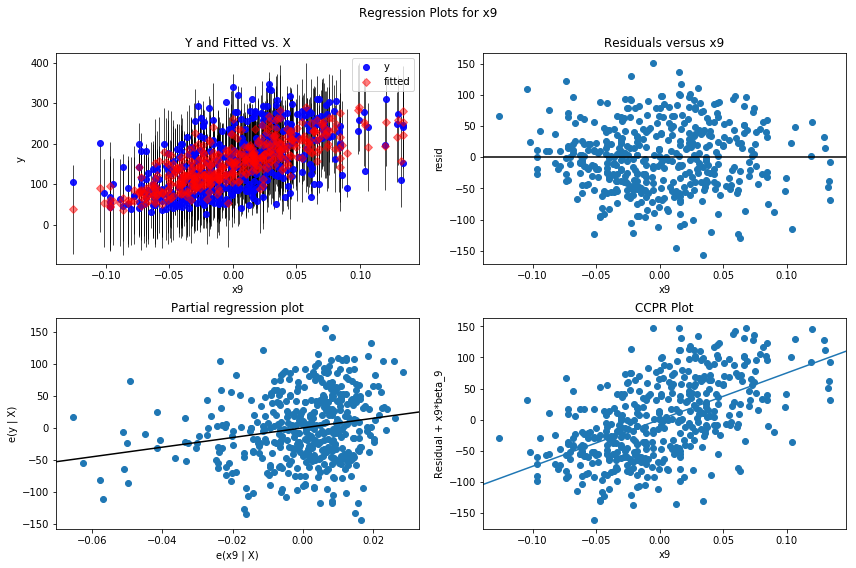

In [14]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est2, 9, fig=fig)

References:

---

[statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html)